# METHODOLOGY
Trong phần này, chúng ta mô tả việc triển khai và các giao thức đào tạo của các mô hình đã thảo luận trước đó, cũng như các bộ dữ liệu và quy trình chúng ta sử dụng để nghiên cứu tính hiệu quả và hiệu quả của chúng.

Table content
* [4.1 Datasets](#4.1Datasets)

## 4.1 Datasets
Các bộ dữ liệu cho **benchmarking-(chấm điểm)** LP thường được lấy bằng cách lấy mẫu KG trong thế giới thực, sau đó chia các dữ liệu thu được thành các tập training, a validation and a test set. Chúng tôi tiến hành phân tích bằng cách sử dụng 5 bộ dữ liệu được thiết lập tốt nhất trong trường LP; chúng tôi báo cáo một số thuộc tính quan trọng nhất của chúng trong Bảng 2.

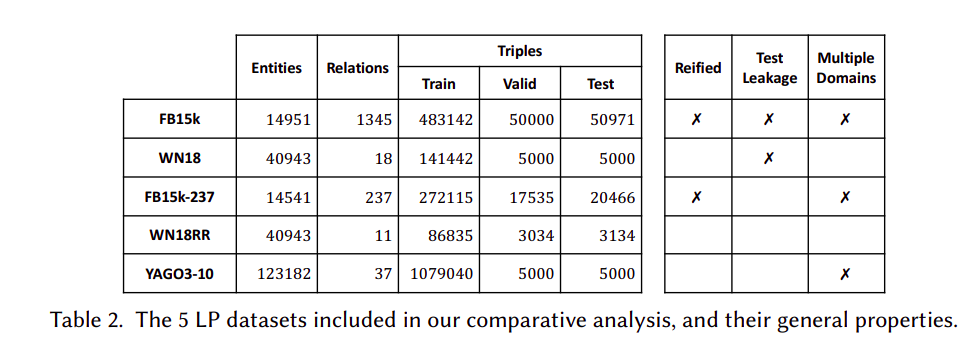

In [1]:
from IPython.display import Image
Image(filename='../images/table2.png')

**FB15k** có lẽ là bộ dữ liệu được sử dụng phổ biến nhất để *benchmark* cho đến nay. Những người tạo ra nó [8](../papers/models/8_TransE.pdf) đã chọn tất cả các thực thể *FreeBase* với hơn 100 đề cập và cũng có trong cơ sở dữ liệu [Wikilinks](https://code.google.com/archive/p/wiki-links/); họ đã trích xuất tất cả các sự kiện liên quan đến họ (bao gồm cả những người hàng xóm cấp thấp hơn), ngoại trừ những một vài thực thể tối nghĩa, ví dụ: ngày tháng, danh từ riêng, v.v ... họ cũng đã chuyển đổi các mối quan hệ $n$-ary (n- cung) được biểu thị bằng sự thống nhất thành các cụm của các cạnh nhị phân; Hoạt động này đã hỗ trợ rất nhiều cho cấu trúc đồ thị và ngữ nghĩa, như được mô tả trong Phần 4.3.4

**WN18** cũng được giới thiệu bởi các tác giả của [TransE-8](../papers/models/8_TransE.pdf), đã được trích xuất từ WordNet3, một bản thể học ngôn ngữ **KG** có nghĩa là cung cấp một dictionary/thesaurus (từ điển) để hỗ trợ NLP và phân tích văn bản tự động. Trong WordNet, các thực thể tương ứng với các từ đồng nghĩa ***synsets*** (word senses) và các mối quan hệ đại diện cho các kết nối từ vựng của chúng (ví dụ: *hypernym*). Để xây dựng WN18, các tác giả đã sử dụng WordNet làm điểm khởi đầu và sau đó lặp đi lặp lại các thực thể và mối quan hệ với quá ít đề cập ***with too few mentions***.

**FB15k-237** là một tập hợp con của FB15k được xây dựng bởi [Toutanova và Chen 57](../papers/datasets/57_FB15k-237.pdf), lấy cảm hứng từ quan sát rằng FB15k bị *test leakage* (rò rỉ thử nghiệm), bao gồm dữ liệu thử nghiệm được nhìn thấy bởi các mô hình tại thời điểm đào tạo. Trong FB15k vấn đề này là do sự hiện diện của các mối quan hệ gần giống nhau hoặc nghịch đảo của nhau. Để đánh giá mức độ nghiêm trọng của vấn đề này, Toutanova và Chen đã chỉ ra rằng một mô hình đơn giản dựa trên các đặc trưng quan sát *observable features* có thể dễ dàng đạt được hiệu suất tốt trên FB15k *state-of-the-ar performance*. FB15k-237 được xây dựng để trở thành một bộ dữ liệu thách thức hơn: các tác giả lần đầu tiên chọn các sự kiện từ FB15k liên quan đến mối quan hệ lớn nhất $401$ và loại bỏ tất cả các mối quan hệ tương đương hoặc nghịch đảo. Để lọc tất cả các bộ ba tầm thường *trivial triples*, họ cũng đảm bảo rằng không có thực thể nào được kết nối trong tập huấn luyện cũng được liên kết trực tiếp trongvalidation and test sets.

**WN18RR** là một tập hợp con của WN18 được xây dựng bởi [Dettmers et al.11](../papers/models/11_ConvE.pdf), cũng là một rò rỉ thử nghiệm quan sát *observing test leakage* trong **WN18**. họ chứng minh mức độ nghiêm trọng của rò rỉ nói trên bằng cách chỉ ra rằng một mô hình dựa trên quy tắc đơn giản dựa trên phát hiện quan hệ nghịch đảo, được đặt tên là Mô hình nghịch đảo **Inverse Model**, đạt được kết quả tiên tiến trong cả **WN18** và **FB15k**. Để giải quyết điều đó, họ xây dựng bộ dữ liệu WN18RR khó khăn hơn nhiều bằng cách áp dụng một đường ống **pipeline** tương tự như đường dẫn được sử dụng cho [FB15k-237_57](../papers/datasets/57_FB15k-237.pdf). Gần đây, các tác giả đã thừa nhận rằng bộ thử nghiệm bao gồm $212$ thực thể không xuất hiện trong tập huấn luyện, khiến cho không thể dự đoán hợp lý khoảng $6,7\%$ sự kiện kiểm tra

**YAGO3-10** được lấy mẫu từ [YAGO3 KG-36](../papers/datasets/36_YAGO3-10.pdf), cũng được đề xuất bởi [Dettmers et al.11](../papers/models/11_ConvE.pdf). Nó đã thu được lựa chọn các thực thể có ít nhất 10 mối quan hệ khác nhau và thu thập tất cả các sự kiện liên quan đến chúng, do đó bao gồm cả các thành phần láng giềng. Hơn nữa, không giống như **FB15k** và **FB15k-237, YAGO3-10** cũng lưu giữ các **facts**(sự kiện) về các phân phối văn bản được tìm thấy trong **KG**. Kết quả là, như các tác giả đã nêu, phần lớn các bộ ba của nó liên quan đến các đặc trưng mô tả của mọi người, chẳng hạn như quyền công dân hoặc giới tính trong các hoạt động kém của Inverse Model - (Mô hình nghịch đảo) [Dettmers et al.11](../papers/models/11_ConvE.pdf) trong YAGO3-10 cho thấy rằng *benchmark* này không nên lấy từ các vấn đề rò rỉ thử nghiệm **test leakage issues** tương tự như FB15k và WN18.

## 4.2 Efficiency Analysis
Đối với mỗi mô hình, chúng tôi xem xét hai công thức chính cho hiệu quả:

* *Thời gian đào tạo - Training Time*: thời gian cần thiết để tìm hiểu các **optimal embeddings** cho tất cả các thực thể và quan hệ.
* *Thời gian dự đoán - Prediction Time*: thời gian cần thiết để tạo ra thứ hạng **Ranks** đầy đủ cho một **fact**-(thực tế) thử nghiệm, bao gồm cả **head and tail predictions**.

Thời gian đào tạo và thời gian dự đoán chủ yếu phụ thuộc:
* (i) vào kiến trúc mô hình (ví dụ: mạng lưới thần kinh sâu có thể yêu cầu tính toán dài hơn do **pipeline** hoạt động vốn có của chúng dài hơn); 
* (ii) trên các mô hình siêu tham số-**model hyperparameters**, chẳng hạn như kích thước nhúng-**embedding size** và số lượng mẫu âm tính cho mỗi mẫu dương tính - **number of negative samples for each positive**; 
* (iii) về kích thước tập dữ liệu, cụ thể là số lượng thực thể và quan hệ cần tìm hiểu và, trong Thời gian đào tạo, số lượng bộ ba đào tạo cần xử lý.

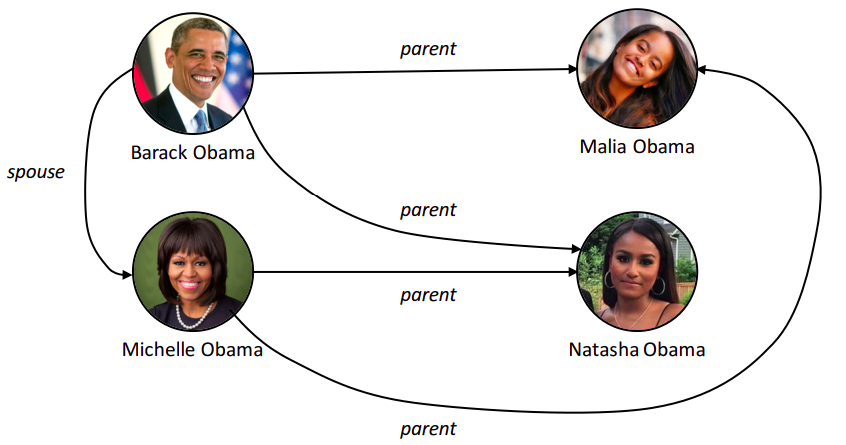

In [2]:
from IPython.display import Image
Image(filename='../images/fig-2_kg.png')

**fig 2** Ví dụ về ***head peers*** và ***tail peers*** trong một phần nhỏ của KG

## 4.3 Effectiveness Analysis
Chúng tôi phân tích tính hiệu quả của các mô hình LP dựa trên cấu trúc của đồ thị đào tạo. do đó, chúng tôi xác định các đặc điểm cấu trúc có thể đo lường được và chúng tôi coi mỗi trong số chúng là một hướng nghiên cứu riêng biệt, điều tra xem nó có liên quan như thế nào đến hiệu suất dự đoán của từng mô hình trong mỗi tập dữ liệu.
Chúng ta tính đến 4 đặc cấu trúc khác nhau cho mỗi thực tế thử nghiệm:
* Number of Peers: cụ thể là các lựa chọn thay thế hợp lệ cho các thực thể nguồn và đích-nói cách khác là số lượng thực thể;
* Relational Path Support: có tính đến các đường dẫn kết nối head và tail của fact thử nghiệm- nói cách khác có tính đến hướng của quan hệ;
* Relation Properties: điều đó ảnh hưởng đến cả ngữ nghĩa và cấu trúc đồ thị;
* Degree of the original reified relation: cho các bộ dữ liệu được tạo từ KG bằng cách sử dụng quan hệ thống nhất

### 4.3.1 Number of Peers
* head peers: là tập các thực thể sao cho $h^{\prime} \in \mathcal{E} ~| ~ \langle h^{\prime},~r, ~t \rangle ~ \in \mathcal{G}_{train}$
* tail peers: là tập các thực thể sao cho $t^{\prime} \in \mathcal{E} ~| ~ \langle h,~r, ~t^{\prime} \rangle ~ \in \mathcal{G}_{train}$

Nói cách khác, các đồng nghiệp đứng đầu là tất cả các lựa chọn thay thế cho h thấy trong quá trình đào tạo, với điều kiện là có quan hệ r và đuôi t. Tương tự, các đồng nghiệp đuôi là lựa chọn thay thế cho t khi đầu là h và quan hệ là r. Nhất quán với ký hiệu được giới thiệu trong Phần 2, chúng tôi xác định các đồng nghiệp cho nguồn và thực thể đích của một dự đoán là các đồng nghiệp nguồn và các đồng nghiệp đích tương ứng.

Chúng tôi minh họa một ví dụ trong Hình 2: xem xét thực tế ⟨Barack Obama, cha mẹ, Malia Obama⟩, thực thể Michelle Obama sẽ là đồng đẳng của Barack Obama, bởi vì thực thể Michelle Obama cũng là cha mẹ của Malia Obama. Tương tự, thực thể Natasha Obama là đồng đẳng của Malia Obama. Theo dự đoán, khi Malia Obama là thực thể nguồn và Barack Obama là thực thể mục tiêu, Michelle Obama là một đối tượng ngang hàng và Natasha Obama là một nguồn ngang hàng. Theo dự đoán, các đồng nghiệp ở đuôi chỉ bị đảo ngược: kể từ bây giờ Malia Obama là thực thể mục tiêu và Barack Obama là thực thể nguồn, Michelle Obama là một đồng nghiệp nguồn trong khi Natasha Obama là đồng nghiệp mục tiêu.
Trực giác của chúng tôi là số lượng các đồng nghiệp nguồn và đích có thể tạo ra các dự đoán với các hình ảnh tinh tế, có thể không dự đoán được.

Một mặt, số lượng các đồng nghiệp nguồn có thể được xem là số lượng mẫu đào tạo mà từ đó các mô hình có thể trực tiếp tìm hiểu cách dự đoán thực thể mục tiêu hiện tại với mối quan hệ hiện tại. Ví dụ, khi thực hiện dự đoán đuôi trên thực tế ⟨Barack Obama, quốc tịch, Hoa Kỳ⟩, các đồng nghiệp nguồn là tất cả các thực thể khác có quốc tịch Hoa Kỳ mà mô hình được nhìn thấy trong đào tạo: họ là những ví dụ mà các mô hình của chúng tôi có thể học được những gì có thể làm cho một người có quốc tịch Mỹ

Mặt khác, số lượng đồng nghiệp mục tiêu có thể được xem là số câu trả lời thỏa mãn chính xác dự đoán này mà người mẫu nhìn thấy trong quá trình đào tạo. Ví dụ, được đưa ra thực tế giống như trước Barack Obama, quốc tịch, Hoa Kỳ, nhưng thực hiện dự đoán đầu lần này, các công dân Hoa Kỳ khác được nhìn thấy trong đào tạo hiện đang nhắm mục tiêu. Vì tất cả chúng tạo thành các lựa chọn thay thế hợp lệ cho các câu trả lời mục tiêu, quá nhiều đồng nghiệp mục tiêu có thể dẫn trực giác các mô hình đến sự nhầm lẫn và suy giảm hiệu suất.

Kết quả thử nghiệm của chúng tôi về các đồng nghiệp nguồn và đích, được báo cáo trong Phần 5.3.1, giả thuyết của chúng tôi